# Movie Recommendation System
## 3 Types of Recommendation System :
1. **Popularity based recommendation system**  
Recommend list of popular movie.
2. **Content based filtering**  
When click certain movie, it will give recommendation of similar movie.
3. **Collaborative filtering**  
Give potential movie that user gonna like based on another data user that has the same type of movie preference.

## Popularity - Based Filtering

### Load the data

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Python\app16-movie-recommendation\data/movies.csv')
credits = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Python\app16-movie-recommendation\data/credits.csv')
ratings = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Python\app16-movie-recommendation\data/ratings.csv')

In [3]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


### Calculate a weighted rating  
WR = (v : (v+m)) x R + (m : (v+m)) x C  
  
- v : number of votes for a movie ==> vote_count (movies df)
- m : minimum number of votes required  
- R : average rating of the movie ==> vote_average (movies df)
- C : average rating accross all movies

In [6]:
# minimum number of votes required
m = movies['vote_count'].quantile(0.9)
round(m,2)

1838.4

In [7]:
# average rating accross all movies
C = movies['vote_average'].mean()
round(C,2)

6.09

In [8]:
# because in vote_count, there is 0, so we're gonna start from minimum number
movies_filtered = movies.copy().loc[movies['vote_count'] >= m]
movies_filtered.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


WR = (v : (v+m)) x R + (m : (v+m)) x C  
- v : number of votes for a movie ==> vote_count (movies df)
- m : minimum number of votes required  
- R : average rating of the movie ==> vote_average (movies df)
- C : average rating accross all movies

In [9]:
# weighted rating
def weighted_rating(df, m=m, C=C):
        v = df['vote_count']
        R = df['vote_average']
        wr = ((v / v+m) * R)  + (m / (v+m) * C)
        return wr

In [10]:
# add weighted rating column
movies_filtered['weighted_rating'] = movies_filtered.apply(weighted_rating, axis=1)
movies_filtered.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,weighted_rating
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,13244.501200
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12693.626983


In [11]:
# sort top 10 popular movies
movies_filtered.sort_values("weighted_rating", ascending = False)[["title", "weighted_rating"]].head(10)

,title,weighted_rating
1881,The Shawshank Redemption,15636.015145
3337,The Godfather,15452.408618
2731,The Godfather: Part II,15269.183637
2294,Spirited Away,15268.992360
3865,Whiplash,15268.858331
1818,Schindler's List,15268.835976
3232,Pulp Fiction,15268.110923
662,Fight Club,15268.015418
2247,Princess Mononoke,15086.010823
1987,Howl's Moving Castle,15086.004701


## Content-Based Filtering

### Term Frequency and Inverse Document Frequency

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf = TfidfVectorizer(stop_words="english")

In [14]:
tfidf

TfidfVectorizer(stop_words='english')

In [15]:
# fill null value at overview column
movies["overview"] = movies["overview"].fillna("")

In [16]:
# convert text to coefficient to know the frequency & rarety
tfidf_matrix = tfidf.fit_transform(movies["overview"])

In [17]:
# get feature names
feature_names = tfidf.get_feature_names_out()

# create new table of tfidf_matrix
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns = feature_names)

In [18]:
df_tfidf.head(2)

,00,000,007,07am,10,100,1000,101,108,10th,...,zuckerberg,zula,zuzu,zyklon,æon,éloigne,émigré,été,única,über
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Term Frequency & Inverse Document Frequency :**
- There are 20,979 words were extracted that was tfidf value
- We need these matrix, so we could transform the word into numbers
- The frequency inside that single description.  
    Example: there is no indicating the frequency of the word "zuckerberg" in first movie.  
- The frequency in the entire dataframe  
    The rarer or the less frequent the words in the entire document,  
    the more weight it will have, like unique word of that movie.

### Similarity matrix.cmproj

In [19]:
from sklearn.metrics.pairwise import linear_kernel

In [20]:
similarity_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

In [21]:
similarity_matrix[:3]

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ]])

In [22]:
similarity_matrix.shape

(4803, 4803)

**Notes :**
- There are 4,803 movie title in this dataframe that we want to compare similarity coefficient.  
- Similarity coefficient in this prediction only consider the "overview" column.
- So to get more accuracy, you need to join other column, example : "keyword", etc.

In [23]:
# check whether similarity_matrix row is the same with movies df
movies.shape

(4803, 20)

### Find the most similar movies to a certain movie

In [24]:
movie_title = "John Carter"

In [25]:
# find index of movie_title
idx = movies.loc[movies["title"] == movie_title].index[0]
idx

4

In [26]:
scores = list(enumerate(similarity_matrix[idx]))

In [27]:
scores[:3]

[(0, 0.0), (1, 0.033368675996424305), (2, 0.0)]

In [28]:
# sorted the result by score, not by index
scores = sorted(scores, key= lambda x : x[1], reverse=True)

In [29]:
scores[:11]

[(4, 1.0),
 (1254, 0.20497253140891997),
 (4161, 0.16370347641323713),
 (2932, 0.12239400129620459),
 (3349, 0.11887151040572358),
 (1307, 0.11468689553107403),
 (3068, 0.11237609168095009),
 (345, 0.09079218287485015),
 (581, 0.0900594125581888),
 (2998, 0.08877535757173034),
 (4274, 0.08576462030578072)]

- This is top 10 that have the same similarity with movie title "John Carter".
- But it is still scores value, not shown movie title yet.
- "John Carter" has index 4 of this dataset, so thats why the first row get result the highest = 1 ==> (4, 1.0)
- So that's why we need to select data **EXCEPT** the first row.

In [30]:
# get 3 top similar movie indices except first row
movies_indices =  [tpl[0] for tpl in scores[1:4]] 
movies_indices

[1254, 4161, 2932]

In [31]:
movies["title"].iloc[movies_indices]

1254                     Get Carter
4161    The Marine 4: Moving Target
2932                   Raising Cain
Name: title, dtype: object

In [32]:
list(movies["title"].iloc[movies_indices])

['Get Carter', 'The Marine 4: Moving Target', 'Raising Cain']

3 Top movie title that is similar with "John Carter" is :
- 'Get Carter'
- 'The Marine 4: Moving Target'
- 'Raising Cain'

### Create function for automation

In [33]:
def similar_movies(movie_title, nr_movies):
    idx = movies.loc[movies["title"] == movie_title].index[0]
    scores = list(enumerate(similarity_matrix[idx]))
    scores = sorted(scores, key= lambda x : x[1], reverse=True)
    movies_indices =  [tpl[0] for tpl in scores[1 : nr_movies+1]] 
    similar_titles = list(movies["title"].iloc[movies_indices])
    return similar_titles

In [34]:
similar_movies("Pirates of the Caribbean: On Stranger Tides", 3)

['Pirates of the Caribbean: The Curse of the Black Pearl',
 'Femme Fatale',
 'Pan']

## Collaborative Filtering with Machine Learning
- We try to predict what user might like watching?

In [35]:
from IPython.display import display, Image

In [36]:
image_data = open('ML+Process.png', 'rb').read()

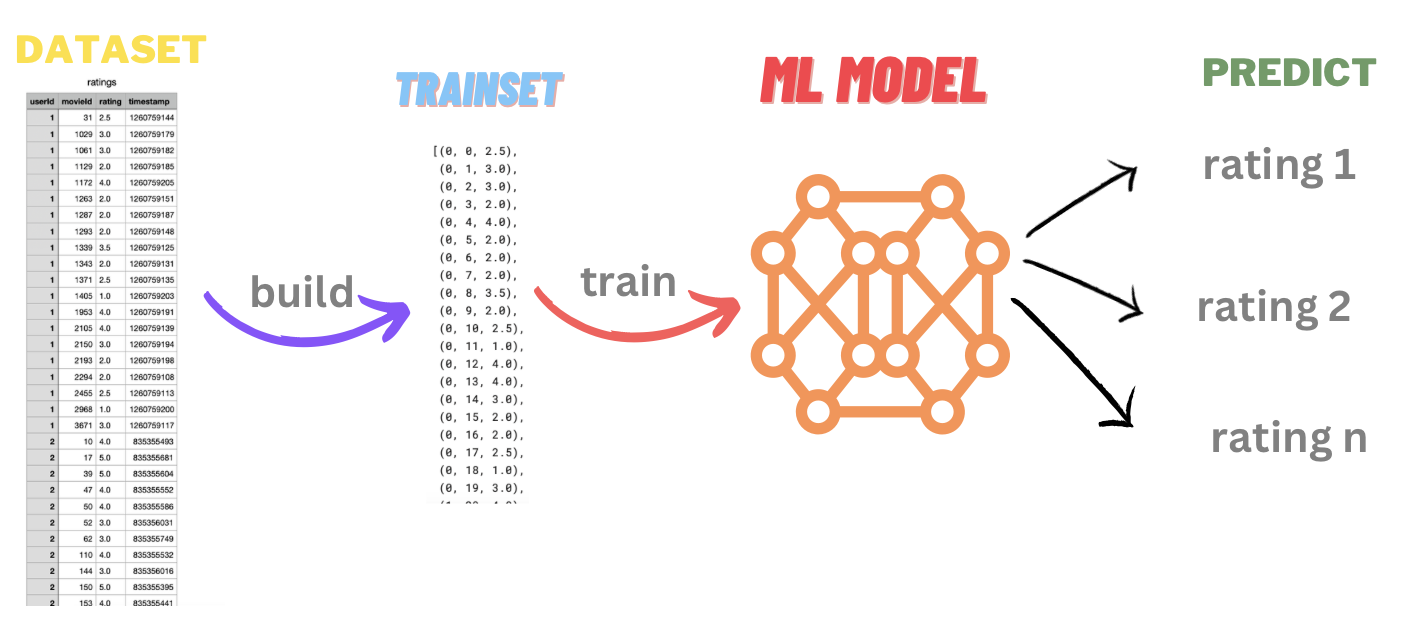

In [37]:
display(Image(data=image_data))

### Load the data

In [47]:
ratings = ratings[["userId","movieId","rating"]]
ratings.head(2)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0


### Create the dataset

In [40]:
from surprise import Dataset, Reader

In [48]:
# The Dataset.load_from_df method expects the DataFrame to have three columns: user, item, and rating
reader = Reader(rating_scale = (1,5))
dataset = Dataset.load_from_df(ratings, reader)

In [49]:
dataset

### Build the trainset

In [50]:
trainset = dataset.build_full_trainset()
trainset

In [52]:
# display head(10)
list(trainset.all_ratings())[:10]

[(0, 0, 2.5),
 (0, 1, 3.0),
 (0, 2, 3.0),
 (0, 3, 2.0),
 (0, 4, 4.0),
 (0, 5, 2.0),
 (0, 6, 2.0),
 (0, 7, 2.0),
 (0, 8, 3.5),
 (0, 9, 2.0)]

### Train the model

In [53]:
from surprise import SVD

In [54]:
# SVD = Singular Value Decomposition
# spesific model used to construct the matrix of users & items
svd = SVD()

In [55]:
svd.fit(trainset)

### What rating of user 15 will give to movie id 1956?

In [56]:
svd.predict(15, 1956)

Prediction(uid=15, iid=1956, r_ui=None, est=3.4391919289891364, details={'was_impossible': False})

In [57]:
svd.predict(15, 1956).est

3.4391919289891364

- The user with id 15 predicted will give ratings 3.49 to movie id 1956
- The ratings quite good because the rating ranges from 1 to 5.

### Validation
- Find the value of errors to know how accurate the model using those dataset

In [58]:
from surprise import model_selection

In [59]:
# RMSE = Root Mean Squared Error
# MAE = Mean Absolute Error
model_selection.cross_validate(svd, dataset, measures=["RMSE", "MAE"])

{'test_rmse': array([0.89285321, 0.90099793, 0.89512462, 0.89737666, 0.8938841 ]),
 'test_mae': array([0.68823869, 0.69104001, 0.68933816, 0.68961787, 0.69169074]),
 'fit_time': (2.6624293327331543,
  2.74442982673645,
  2.740471363067627,
  2.7229506969451904,
  2.786069631576538),
 'test_time': (0.3229844570159912,
  0.3122830390930176,
  0.32830286026000977,
  0.30452585220336914,
  0.3111608028411865)}

- test_rmse: This is the Root Mean Squared Error (RMSE) for each fold in the cross-validation. RMSE measures the average magnitude of the errors between predicted and actual ratings. Lower values are better, and the array shows the RMSE for each fold.
- test_mae: This is the Mean Absolute Error (MAE) for each fold. MAE is another measure of prediction accuracy. As with RMSE, lower values are better. The array shows the MAE for each fold.
- Lower RMSE and MAE values indicate better predictive performance.  
  
Rough guideline for interpreting RMSE values:
- RMSE close to 0: Excellent model (very accurate predictions).
- RMSE between 0 and 1: Good model (reasonably accurate predictions).
- RMSE above 1: There might be room for improvement, and the model's predictions have a significant level of error.  
  
 Because our RMSE and MAE is between 0 and 1, so it is reasonably accurate predictions